In [1]:
import numpy as np 
import pandas as pd  
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("C:/Users/User/Downloads/movies.csv/movies.csv",header=0)

In [3]:
df

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
9994,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",NaN,\nAdd a Plot\n,\n \n Stars:\nMorgan Taylor Camp...,NaN,NaN,NaN
9995,Arcane,(2021– ),"\nAnimation, Action, Adventure",NaN,\nAdd a Plot\n,\n,NaN,NaN,NaN
9996,Heart of Invictus,(2022– ),"\nDocumentary, Sport",NaN,\nAdd a Plot\n,\n Director:\nOrlando von Einsiedel\n| \n ...,NaN,NaN,NaN
9997,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",NaN,\nAdd a Plot\n,\n Director:\nJovanka Vuckovic\n| \n Sta...,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    9999 non-null   object 
 1   YEAR      9355 non-null   object 
 2   GENRE     9919 non-null   object 
 3   RATING    8179 non-null   float64
 4   ONE-LINE  9999 non-null   object 
 5   STARS     9999 non-null   object 
 6   VOTES     8179 non-null   object 
 7   RunTime   7041 non-null   float64
 8   Gross     460 non-null    object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [5]:
df.isnull().sum()

MOVIES         0
YEAR         644
GENRE         80
RATING      1820
ONE-LINE       0
STARS          0
VOTES       1820
RunTime     2958
Gross       9539
dtype: int64

In [6]:
df.shape

(9999, 9)

In [7]:
df.drop(['Gross'],axis=1,inplace=True)

In [8]:
df.sample()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime
3412,Sound & Fury,(2019),"\nAnimation, Short",6.4,\nA post-apocalyptic anime music film featurin...,"\n Directors:\nMichael Arias, \nMasaru Mats...","1,587",41.0


In [9]:
df.describe()

,RATING,RunTime
count,8179.000000,7041.000000
mean,6.921176,68.688539
std,1.220232,47.258056
min,1.100000,1.000000
25%,6.200000,36.000000
50%,7.100000,60.000000
75%,7.800000,95.000000
max,9.900000,853.000000


In [10]:
df.duplicated().sum()

431

In [11]:
df=df.drop_duplicates()

In [12]:
df.to_csv('cleandata',index=False)


In [13]:
df.duplicated().sum()

0

In [14]:
#finding the datatype of each feature

df.dtypes

MOVIES       object
YEAR         object
GENRE        object
RATING      float64
ONE-LINE     object
STARS        object
VOTES        object
RunTime     float64
dtype: object

In [15]:
df.isnull().sum() 

MOVIES         0
YEAR         542
GENRE         78
RATING      1400
ONE-LINE       0
STARS          0
VOTES       1400
RunTime     2560
dtype: int64

In [16]:

replace=df['YEAR'].fillna(df["YEAR"].mode()[0],inplace=True)
replace=df['GENRE'].fillna(df["GENRE"].mode()[0],inplace=True)

df['VOTES'] = df['VOTES'].str.replace(',', '').astype('float64')



In [17]:
# separating a categorical column from numerical columns

df1=df.select_dtypes(exclude=['object'])

In [18]:
df2=df.select_dtypes(exclude=['float64','int64'])

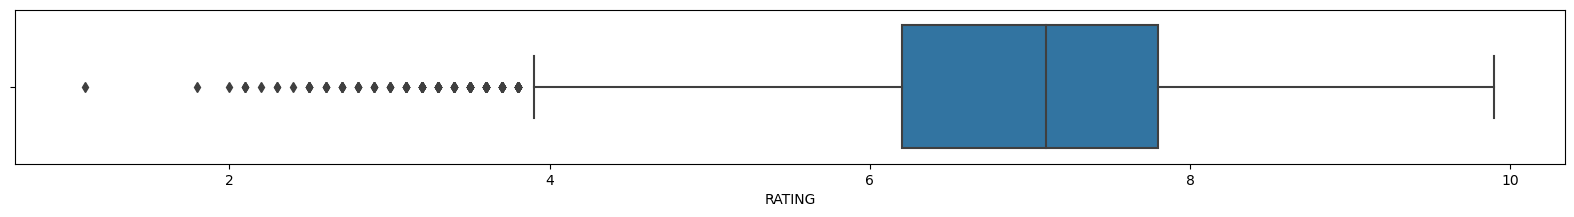

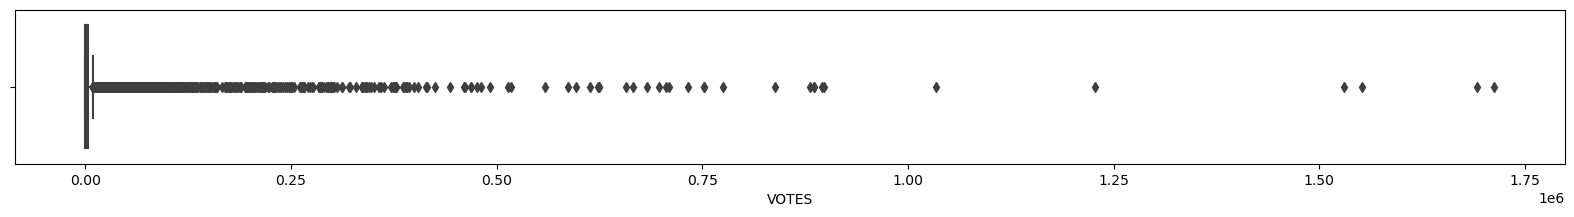

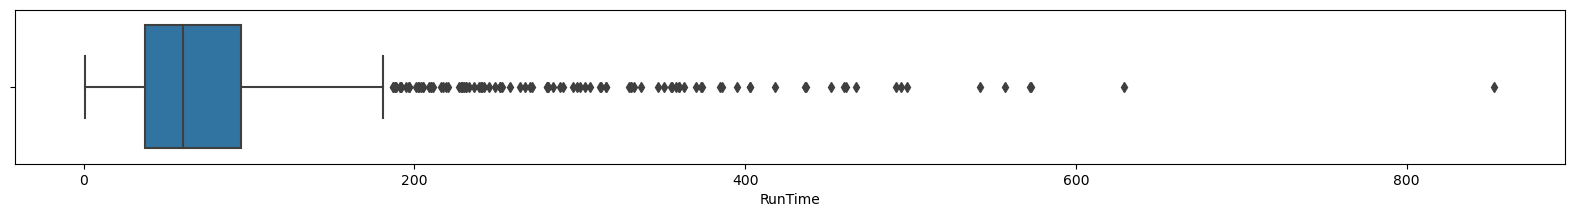

In [19]:
# Applying a box-plot to check the outliers
for column in df1:
    plt.figure(figsize=(20,2))
    sns.boxplot(data=df1,x=column)

In [20]:
import numpy as np

def remove_outliers(df1):
    """
    Removes outliers from a given dataset using the Z-score method.
    
    :param data: a 1D numpy array of data
    :return: a 1D numpy array with outliers removed
    """
    # Calculate the Z-scores
    z_scores = np.abs((df1 - np.mean(df1)) / np.std(df1))

    # Define a threshold for outlier detection
    threshold = 5.0

    # Identify the outliers
    outliers = z_scores > threshold

    # Remove the outliers
    cleaned_data = df1[~outliers]

    return cleaned_data


In [21]:
# Remove outliers
cleaned_data = remove_outliers(df1)

# Print the cleaned data
print(cleaned_data)

      RATING    VOTES  RunTime
0        6.1  21062.0    121.0
1        5.0  17870.0     25.0
2        8.2      NaN     44.0
3        9.2      NaN     23.0
4        NaN      NaN      NaN
...      ...      ...      ...
9993     NaN      NaN      NaN
9995     NaN      NaN      NaN
9996     NaN      NaN      NaN
9997     NaN      NaN      NaN
9998     NaN      NaN      NaN

[9568 rows x 3 columns]


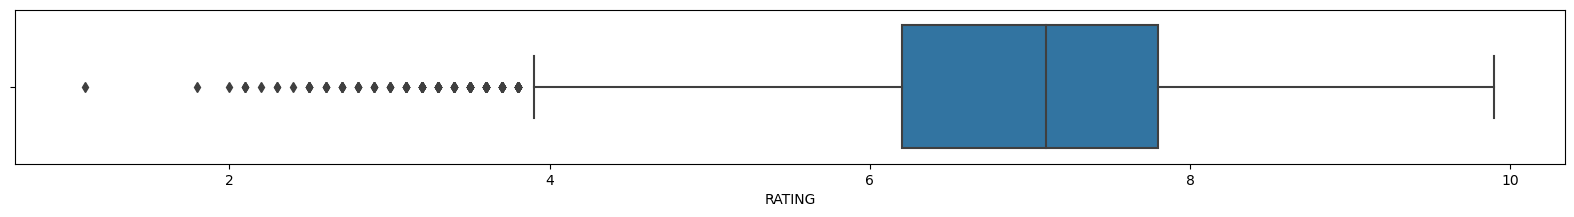

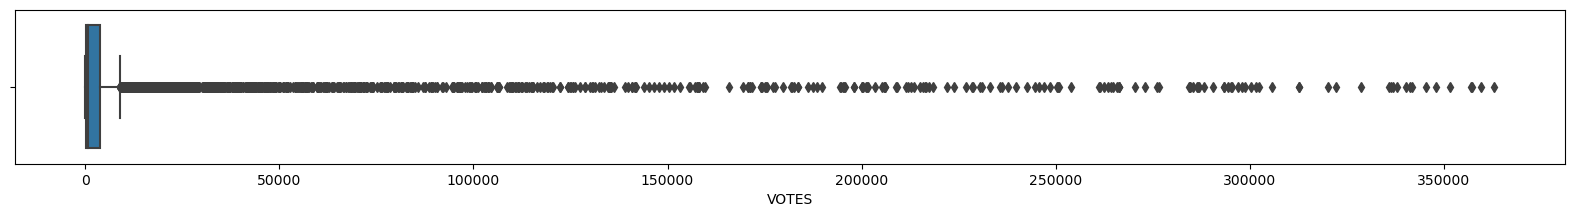

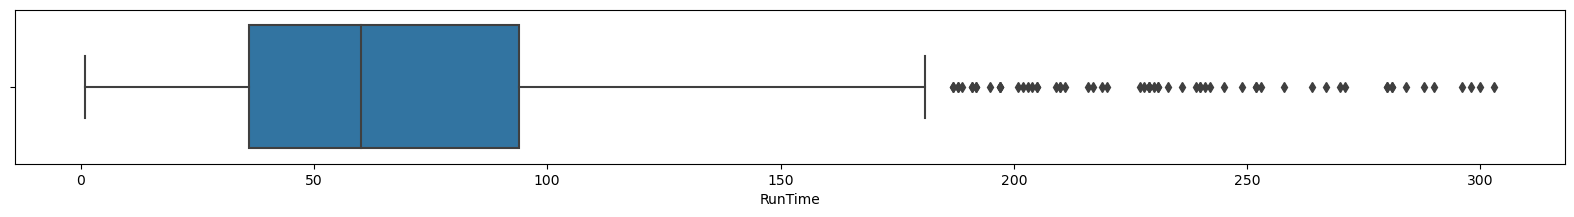

In [22]:
# Applying a box-plot to check the outliers
for column in df1:
    plt.figure(figsize=(20,2))
    sns.boxplot(data=cleaned_data,x=column)

In [23]:
df1.isnull().sum()

RATING     1400
VOTES      1400
RunTime    2560
dtype: int64

In [24]:
# missing value treatment using median
median_rating = df1['RATING'].median()
df1['RATING'] = df1['RATING'].fillna(median_rating)


In [25]:
median_runtime = df1['RunTime'].median()
df1['RunTime'] = df1['RunTime'].fillna(median_runtime)


In [26]:
df1.isnull().sum()

RATING        0
VOTES      1400
RunTime       0
dtype: int64

In [27]:
df=pd.concat([df1,df2],axis=1)

In [28]:
df.shape

(9568, 8)

In [29]:
df

,RATING,VOTES,RunTime,MOVIES,YEAR,GENRE,ONE-LINE,STARS
0,6.1,21062.0,121.0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...
1,5.0,17870.0,25.0,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara..."
2,8.2,885805.0,44.0,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n..."
3,9.2,414849.0,23.0,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n..."
4,7.1,NaN,60.0,Army of Thieves,(2021),"\nAction, Crime, Horror","\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...
...,...,...,...,...,...,...,...,...
9993,7.1,NaN,60.0,Totenfrau,(2022– ),"\nDrama, Thriller",\nAdd a Plot\n,\n Director:\nNicolai Rohde\n| \n Stars:...
9995,7.1,NaN,60.0,Arcane,(2021– ),"\nAnimation, Action, Adventure",\nAdd a Plot\n,\n
9996,7.1,NaN,60.0,Heart of Invictus,(2022– ),"\nDocumentary, Sport",\nAdd a Plot\n,\n Director:\nOrlando von Einsiedel\n| \n ...
9997,7.1,NaN,60.0,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",\nAdd a Plot\n,\n Director:\nJovanka Vuckovic\n| \n Sta...


In [30]:
df.isnull().sum()

RATING         0
VOTES       1400
RunTime        0
MOVIES         0
YEAR           0
GENRE          0
ONE-LINE       0
STARS          0
dtype: int64

In [31]:
df.dtypes

RATING      float64
VOTES       float64
RunTime     float64
MOVIES       object
YEAR         object
GENRE        object
ONE-LINE     object
STARS        object
dtype: object

In [37]:

from sklearn.preprocessing import LabelEncoder

Label = LabelEncoder() 
df['MOVIES'] = Label.fit_transform(df['MOVIES'])
df['YEAR'] = Label.fit_transform(df['YEAR'])
df['GENRE'] = Label.fit_transform(df['GENRE'])
df['ONE-LINE'] = Label.fit_transform(df['ONE-LINE'])
df['STARS'] = Label.fit_transform(df['STARS'])



In [38]:
df.dtypes

RATING      float64
VOTES       float64
RunTime     float64
MOVIES        int64
YEAR          int64
GENRE         int64
ONE-LINE      int64
STARS         int64
dtype: object

In [39]:
df

,RATING,VOTES,RunTime,MOVIES,YEAR,GENRE,ONE-LINE,STARS
0,6.1,3295.0,121.0,1139,338,60,1548,6057
1,5.0,3209.0,25.0,3719,339,112,7482,622
2,8.2,4119.0,44.0,6022,222,387,6371,305
3,9.2,4088.0,23.0,4621,255,123,2222,1476
4,7.1,4129.0,60.0,836,338,31,1108,5543
...,...,...,...,...,...,...,...,...
9993,7.1,4129.0,60.0,370,342,409,1744,5819
9995,7.1,4129.0,60.0,20,339,112,1744,0
9996,7.1,4129.0,60.0,139,342,350,1744,5901
9997,7.1,4129.0,60.0,325,339,86,1744,4907


In [40]:
df.duplicated().sum()

0